<a href="https://colab.research.google.com/github/FreeeSoul/realFastCampus/blob/main/3_ch1_11Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
Tortoies_Speed = 1 #@param {type:'slider', min:0, max:10, step:1}
Tortoies_Bias = 4 #@param {type:'slider', min:0, max:10, step:1}
Hare_Speed = 2 #@param {type:'slider', min:0, max:10, step:1}

MAXVAL = 10
INTERVAL = (MAXVAL*10) + 1
doMeet = False
t_xdata, t_ydata, h_xdata, h_ydata = [], [], [], []

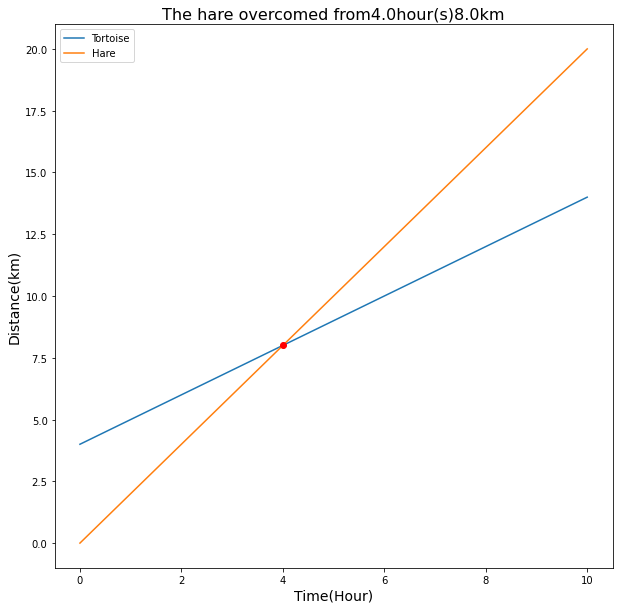

In [7]:
# 피규어 사이즈 형셩
plt.figure(figsize=(10, 10))

for t in np.linspace(0, MAXVAL, INTERVAL):
  t_y = Tortoies_Speed * t + Tortoies_Bias
  h_y = Hare_Speed*t
  t_xdata.append(t)
  t_ydata.append(t_y)
  h_xdata.append(t)
  h_ydata.append(h_y)

  if (h_y >= t_y and (not doMeet)):
    doMeet = True
    meetTime = t
    meetDistance = t_y

plt.plot(t_xdata, t_ydata, label="Tortoise")
plt.plot(h_xdata, h_ydata, label="Hare")

if doMeet:
  plt.title('The hare overcomed from' + str(math.ceil(meetTime*100)/100)+'hour(s)'+str(math.ceil(meetDistance*100)/100) + 'km', fontsize=16)
  plt.plot(meetTime, meetDistance, 'ro')
else:
  plt.title('They will not meet', fontsize=16)

plt.xlabel('Time(Hour)', fontsize=14)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()
plt.show()

#2. Tensorflow

In [8]:
#2. Tensorflow -> 위에서 진행한 토끼 거북이 선형회귀를 텐서플로우 이용해서 진짜 머신러닝 방식으로 해보기

In [9]:
import tensorflow as tf

In [10]:
learning_rate = 0.01
learning_epochs = 100

In [11]:
model = tf.keras.models.Sequential()
# 모델 종류를 Sequential모델을 쓴다는 이야기고, 이 모델은 여러 개의
#레이어를 쓸 수 있게끔 해주는 것이다.
model.add(tf.keras.layers.Dense(1, input_dim=1))
# 레이어를 추가한다는 코드고 Dense레이어를 추가하고 있다. 파라미터 두 개는 각각 유닛 개수
#와 입력 dimension 개수이다. (1, 1개)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# 옵티마이저 방식(최적화 방식)을 정해서 변수 sgd에 넣고 있다.
# 여기서는 Gredient Descent 방식으로 최적화 하려고함
mse = tf.keras.losses.mean_squared_error
# 비용함수 방식 선택 중.... 여기서는 squared_error mean방식 사용 중
# 중요한 건 제곱한다는게 중요. 평균은 별로 상관 X
model.compile(loss=mse, optimizer=sgd)

In [12]:
# 모델이 잘 내가 생각했던대로 나왔는지 확인하는 코드
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Model Trainning

In [13]:
# 이제 우리가 만든 모델로 학습을 해야함

In [14]:
# t_history 라는 학습에 대한 객체를 만들려 한다
t_history = model.fit(t_xdata, t_ydata, epochs=learning_epochs)


Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 142.0834
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 3.1048
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 2.9679
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8543
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 2.7328
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 2.6079
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 2.5642
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 2.4042
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 2.3264
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 2.2674
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1906
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0522
Epoch 13/100
4/4 [==============================] - 0s 4ms/

In [ ]:
# 우리는 지금 거북이 입, 출력값으로 선형회귀 함수를 학습을 토대로 만들려고 하는 것이다.

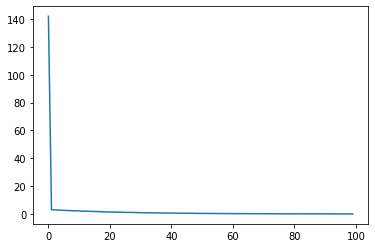

In [15]:
plt.plot(t_history.history['loss'])
# 학습에 대한 결과의 객체 t_history에서 loss가 얼마나 되나
# 그래프로 확인하려고 한다.
plt.show()

In [20]:
result = model.predict([10]) # predict의 의미는 학습이 완료된 모델에
#에 대하여 일차함수가 생성되었을 것이고 이제 입력 10에 대한 예측 출력이
#뭔지가 result에 저장되는거임.
print(result)

[[14.282089]]


In [21]:
p_ydata = model.predict(t_xdata) # t_xdata 전체에 대한 예측을 요구
#하고 있음 그러므로 그래프 형태, 즉 일차함수로 나올 것이다.

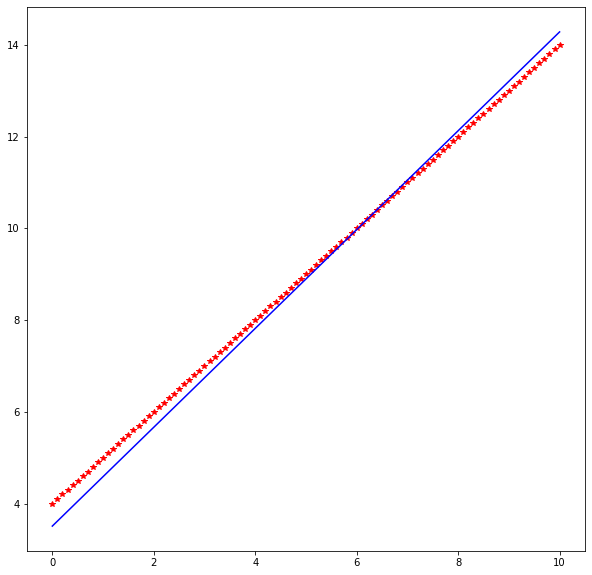

In [22]:
plt.figure(figsize=(10, 10))

plt.plot(t_xdata, t_ydata, 'r*')
plt.plot(t_xdata, p_ydata, 'b')